# Importing libraries

In [29]:
import pandas as pd
import numpy as np
import os

In [30]:
PATH = '02 DATA'

## Import products.csv

In [31]:

df_products = pd.read_csv(os.path.join(PATH, 'Original Data', 'products.csv'), index_col = False)

## Import orders.wrangled.csv

In [32]:
df_orders = pd.read_csv(os.path.join(PATH, 'Prepared Data', 'orders_wrangled.csv'), index_col = False)

## Find and change the mixed data type


In [33]:
# Create a dataframe

df_test = pd.DataFrame()

In [34]:
# Create a mixed type column

df_test['mix'] = ['a', 'b', 1, True]

In [35]:
df_test.head()

,mix
0,a
1,b
2,1
3,True


In [36]:
# check for mixed-type column

for col in df_test.columns.tolist():
  weird = (df_test[[col]].applymap(type) != df_test[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_test[weird]) > 0:
    print (col)

mix


In [37]:
# change the datatype

df_test['mix'] = df_test['mix'].astype('str')

In [38]:
type('mix')

str

## Finding missing value in dataframe

In [39]:
# Finding missing values-- Products name has 16 missing values

df_products.isnull().sum()

product_id        0
product_name     16
aisle_id          0
department_id     0
prices            0
dtype: int64

In [40]:
# Create a new dataframe or create a subset

df_nan = df_products[df_products['product_name'].isnull() == True ]

In [41]:
df_nan

,product_id,product_name,aisle_id,department_id,prices
33,34,NaN,121,14,12.2
68,69,NaN,26,7,11.8
115,116,NaN,93,3,10.8
261,262,NaN,110,13,12.1
525,525,NaN,109,11,1.2
1511,1511,NaN,84,16,14.3
1780,1780,NaN,126,11,12.3
2240,2240,NaN,52,1,14.2
2586,2586,NaN,104,13,12.4
3159,3159,NaN,126,11,13.1


## Imputing missing value with mean or median ( for numeric missing value)

In [42]:
# Imputing missing value with mean- for checking  the mean value

df_products.describe()

,product_id,aisle_id,department_id,prices
count,49693.000000,49693.000000,49693.000000,49693.000000
mean,24844.345139,67.770249,11.728433,9.994136
std,14343.717401,38.316774,5.850282,453.519686
min,1.000000,1.000000,1.000000,1.000000
25%,12423.000000,35.000000,7.000000,4.100000
50%,24845.000000,69.000000,13.000000,7.100000
75%,37265.000000,100.000000,17.000000,11.200000
max,49688.000000,134.000000,21.000000,99999.000000


In [43]:
# Imputing missing value with mean-use this

df['column with missings'].fillna(mean value, inplace=True)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1292122010.py, line 3)

In [ ]:
# Imputing missing value with median-use this

df_prods.median()-first this

df['column with missings'].fillna(median value, inplace=True)

## dealing with missing values in 'string' datatype


In [44]:
# to check the no of rows of previous df

df_products.shape

(49693, 5)

In [45]:
# create a new dataframe- create a subset without missing value

df_products_clean = df_products[df_products['product_name'].isnull()== False]


In [46]:
df_products_clean.shape

(49677, 5)

In 'string' dataframe - missing value should be remove and continue the analysis, because in string we can't imputing the value with mean and median then it is removed' to create a new dataframe or subset without missing value with the code " df_clean = df[df['column_name'].isnull()==False]

In [47]:
# find the duplicates values

df_dups = df_products[df_products.duplicated()]

In [48]:
df_dups

,product_id,product_name,aisle_id,department_id,prices
462,462,Fiber 4g Gummy Dietary Supplement,70,11,4.8
18459,18458,Ranger IPA,27,5,9.2
26810,26808,Black House Coffee Roasty Stout Beer,27,5,13.4
35309,35306,Gluten Free Organic Peanut Butter & Chocolate ...,121,14,6.8
35495,35491,Adore Forever Body Wash,127,11,9.9


In [49]:
# drop the duplicates value

df_products.drop_duplicates()

,product_id,product_name,aisle_id,department_id,prices
0,1,Chocolate Sandwich Cookies,61,19,5.8
1,2,All-Seasons Salt,104,13,9.3
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,5,Green Chile Anytime Sauce,5,13,4.3
...,...,...,...,...,...
49688,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,5.3
49689,49685,En Croute Roast Hazelnut Cranberry,42,1,3.1
49690,49686,Artisan Baguette,112,3,7.8
49691,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,4.7


In [50]:
# create a clean product dataframe

df_products_clean = df_products.drop_duplicates()



In [51]:
df_products_clean

,product_id,product_name,aisle_id,department_id,prices
0,1,Chocolate Sandwich Cookies,61,19,5.8
1,2,All-Seasons Salt,104,13,9.3
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,5,Green Chile Anytime Sauce,5,13,4.3
...,...,...,...,...,...
49688,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,5.3
49689,49685,En Croute Roast Hazelnut Cranberry,42,1,3.1
49690,49686,Artisan Baguette,112,3,7.8
49691,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,4.7


# Task -4.5

## 2.Consistency check for df_orders

In [52]:
df_orders.head()

,order_id,user_id,order_number,order_dow,order_hod,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0


In [53]:
# Rename column

df_orders = df_orders.rename(columns = {'order_dow':'order_day_of_week','order_hod':'order_hour_of_day'})


In [54]:
df_orders.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0


In [55]:
# Description of df_orders

df_orders.describe()


,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In the above description of df_orders dataframe, i didn't find that look off and needs to futher investigation.


## 3. Check for mixed-type data

In [56]:
# Check for mixed-type data in df_orders

for col in df_orders.columns.tolist():
  weird = (df_orders[[col]].applymap(type) != df_orders[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_orders[weird]) > 0:
    print (col)

## 4.

There is no any mixed_type data in df_orders.

## 5.check for missing values 

In [58]:
# check for missing value in df_orders

df_orders.isnull().sum()


order_id                       0
user_id                        0
order_number                   0
order_day_of_week              0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

There are 206209 missing value in days_since_prior_order column and the missing value shows as NaN in rows.

In [59]:
# to check the rows and column 
df_orders.shape

(3421083, 6)

## 6.Address the missing values


In [60]:
# Adrees the missing value in df_orders - .apply to change the format of describe value3-scintific to normal

df_orders.describe().apply(lambda s: s.apply('{0:.5f}'.format))


,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order
count,3421083.00000,3421083.00000,3421083.00000,3421083.00000,3421083.00000,3214874.00000
mean,1710542.00000,102978.20806,17.15486,2.77622,13.45202,11.11484
std,987581.73982,59533.71779,17.73316,2.04683,4.22609,9.20674
min,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000
25%,855271.50000,51394.00000,5.00000,1.00000,10.00000,4.00000
50%,1710542.00000,102689.00000,11.00000,3.00000,13.00000,7.00000
75%,2565812.50000,154385.00000,23.00000,5.00000,16.00000,15.00000
max,3421083.00000,206209.00000,100.00000,6.00000,23.00000,30.00000


In [61]:
# Imputing the missing value with mean

df_orders['days_since_prior_order'].fillna(1.111484e+01, inplace=True)


In [62]:
df_orders.median()

order_id                  1710542.0
user_id                    102689.0
order_number                   11.0
order_day_of_week               3.0
order_hour_of_day              13.0
days_since_prior_order          8.0
dtype: float64

<Axes: >

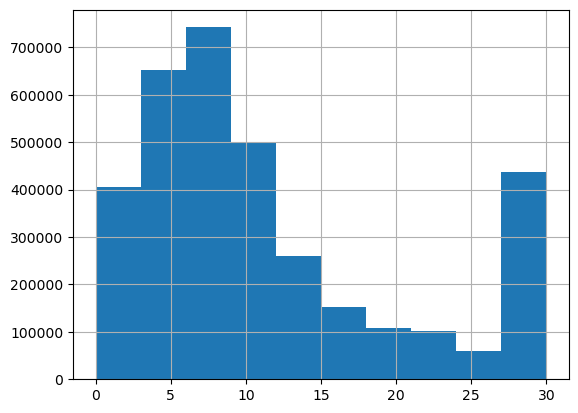

In [63]:
# to check the whether data is normally distributed or skewed

df_orders['days_since_prior_order'].hist()


I have imputed the missing value with mean because 
Mean is 1.111484e+01,
Min value is 0,
max value is 3, 
and the median of the column is 7

In this, the mean is between the min and max value, that is the appropriate impution for the missing value.


## 7.check for duplicate values

In [64]:
# check for duplicate value 

df_duplicates = df_orders[df_orders.duplicated()]


In [65]:
df_duplicates

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order


In [66]:
df_orders.shape

(3421083, 6)

There is no any duplicates value in the df_orders.

## 8.Address the duplicates values

In [70]:
# drop the duplicates value

df_orders.drop_duplicates()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,11.11484
1,2398795,1,2,3,7,15.00000
2,473747,1,3,3,12,21.00000
3,2254736,1,4,4,7,29.00000
4,431534,1,5,4,15,28.00000
...,...,...,...,...,...,...
3421078,2266710,206209,10,5,18,29.00000
3421079,1854736,206209,11,4,10,30.00000
3421080,626363,206209,12,1,12,18.00000
3421081,2977660,206209,13,1,12,7.00000


Rows and columns are same, that means no any duplicated value available in the df_orders.

## Export df_orders dataframe as “orders_clean.csv”


In [71]:
df_orders.to_csv(os.path.join(PATH,'Prepared Data', 'orders_clean.csv'),index = False)

## Export df_products dataframe as “products_clean.csv”

In [72]:
df_products.to_csv(os.path.join(PATH,'Prepared Data', 'products_clean.csv'),index = False)